==================================> 022_discard.json


,#,Coverage,Event,Event_line,Year
0,1,81,,0,1995
1,2,81,,0,1996
2,3,81,Medicaid coverage for kids,81,1997
...,...,...,...,...,...
13,14,83,,0,2008
14,15,83,,0,2009
15,16,82,,0,2010


,#,Coverage,Event,Event_line,Year
0,1,81,,0,1995
1,2,81,,0,1996
2,3,81,Medicaid coverage for kids,81,1997
...,...,...,...,...,...
13,14,83,,0,2008
14,15,83,,0,2009
15,16,82,,0,2010


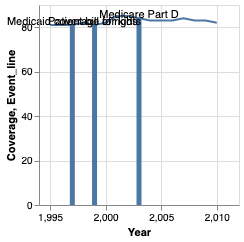

==================================> 022.json


,2008,2009,2010,2011,2012,2013,label
0,61,70,4,55,144,132,Category 1
1,128,22,91,61,55,47,Category 2
2,12,95,35,12,22,82,Category 3
3,93,24,16,27,55,13,Category 4
4,88,73,129,23,101,23,Category 5
5,22,28,94,74,60,83,Category 6


,label,value,variable
0,Category 1,61,2008
1,Category 2,128,2008
2,Category 3,12,2008
...,...,...,...
33,Category 4,13,2013
34,Category 5,23,2013
35,Category 6,83,2013


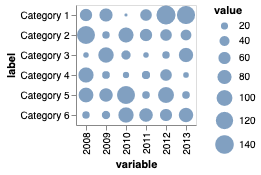

In [1]:
import json
import pandas as pd
import os
from vega import VegaLite
from IPython.display import display, HTML
%run table_utils

pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 10)

CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))
benchmark_dir = "../benchmarks"

def display_benchmark(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        raw_data = benchmark["input_data"]
        vis_data = benchmark["output_data"]
        chart = benchmark["spec"] if "spec" in benchmark else benchmark["vl_spec"]
        in_df = pd.DataFrame.from_records(raw_data)
        out_df = pd.DataFrame.from_records(vis_data)
        display(in_df)
        display(out_df)
        VegaLite(chart, out_df).display()

for fname in os.listdir(benchmark_dir):
    if not fname.endswith(".json"): continue
    if not "22" in fname: continue
    print("==================================> {}".format(fname))
    display_benchmark(fname)

In [2]:
import json
with open("/Users/clwang/Desktop/temp.json", "r") as f:
    x = json.load(f)
    for r in x:
        for key in r:
            if key in ["Peak", "activity"]: continue
            r[key] = round(r[key] * 100000000, 3)
        
with open("/Users/clwang/Desktop/temp2.json", "w") as g:
    json.dump(x, g)
    